##Step_1

(a_1) Loading dependancies and data

In [ ]:
pip install pyts

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from pyts.image import GramianAngularField

In [ ]:

# Define the ticker symbol
ticker_symbol = 'MSFT'

# Get the data
data = yf.download(ticker_symbol, start='2015-01-01',end='2023-07-05')



[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-27,331.859985,336.149994,329.299988,334.570007,334.570007,24354100
2023-06-28,334.660004,337.980011,333.809998,335.850006,335.850006,20259500
2023-06-29,334.709991,336.109985,332.619995,335.049988,335.049988,16997000
2023-06-30,337.750000,342.730011,337.200012,340.540009,340.540009,26823800
2023-07-03,339.190002,340.899994,336.570007,337.989990,337.989990,12508700


In [ ]:
data.shape

(2139, 6)

(a-2) Summary statistics and Presentation

We download data from 1st January 2015 to the latest date available of the microsoft stock represented by ticker 'MSFT'. The latest date available was 5th May 2023 . We present below the graphical representation of the same.

Summary Statistics for Prices:
count    2139.000000
mean      146.572884
std        93.483414
min        35.095703
25%        59.278202
50%       114.300484
75%       237.423058
max       348.100006
Name: Adj Close, dtype: float64

Summary Statistics for Daily Returns:
count    2138.000000
mean        0.000991
std         0.017731
min        -0.159454
25%        -0.006797
50%         0.000843
75%         0.009915
max         0.132929
Name: Adj Close, dtype: float64


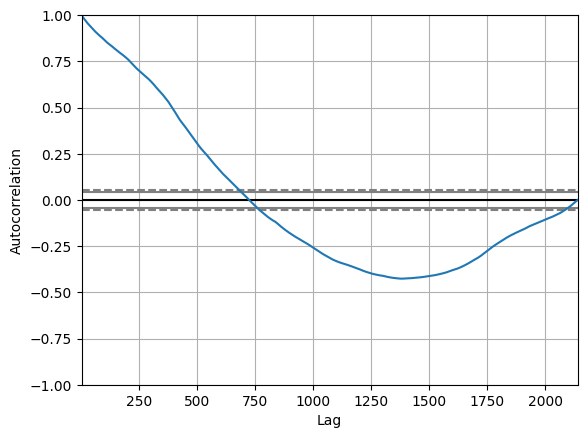

In [ ]:
# Calculate summary statistics for prices
ticker_prices = data['Adj Close']
price_stats = ticker_prices.describe()
print("Summary Statistics for Prices:")
print(price_stats)

# Calculate summary statistics for daily returns
#ticker_returns = ticker_prices.pct_change().dropna()
ticker_returns = np.log(ticker_prices/ ticker_prices.shift(1)).dropna()
return_stats = ticker_returns.describe()
print("\nSummary Statistics for Daily Returns:")
print(return_stats)

# Calculate autocorrelation
autocorr = pd.plotting.autocorrelation_plot(ticker_prices)
plt.show()


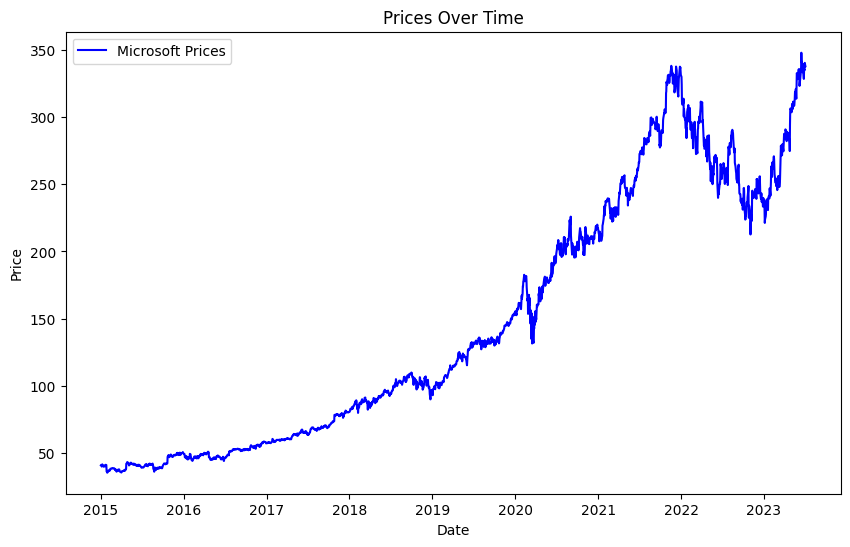

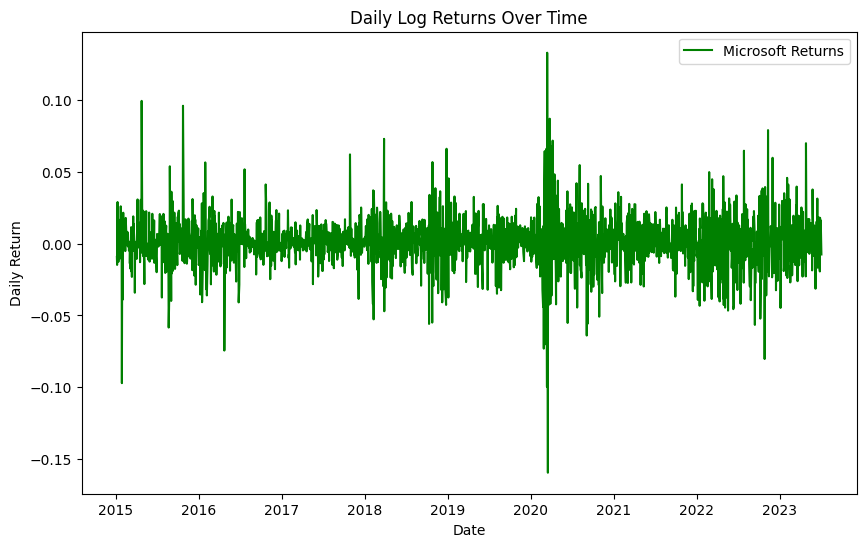

In [ ]:
ticker_prices = data['Adj Close']
ticker_returns = np.log(ticker_prices/ ticker_prices.shift(1)).dropna()


# Visualize prices over time
plt.figure(figsize=(10, 6))
plt.plot(ticker_prices, color='blue')  # Change color to blue
plt.title("Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Microsoft Prices"])  # Adding legend for the line plot
plt.show()

# Visualize returns over time
plt.figure(figsize=(10, 6))
plt.plot(ticker_returns, color='green')  # Change color to green
plt.title("Daily Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(["Microsoft Returns"])  # Adding legend for the line plot
plt.show()


(a_3) Testing for Stationerity

In [ ]:


# Assuming your single series is stored in 'ticker_prices'
# Perform Augmented Dickey-Fuller test
result = adfuller(ticker_prices)

# Extract test statistic, p-value, and critical values
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Define the significance level (alpha)
alpha = 0.05

# Print the test results
print("ADF Test Results:")
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Make a decision based on the test results
if p_value < alpha:
    print("The time series is stationary. Reject the null hypothesis.")
else:
    print("The time series is not stationary. Fail to reject the null hypothesis.")



ADF Test Results:
Test Statistic: 0.3922433434168727
P-value: 0.9812025421134782
Critical Values:
	1%: -3.4334252475234646
	5%: -2.8628985239834686
	10%: -2.567493212493555
The time series is not stationary. Fail to reject the null hypothesis.


In [ ]:


# Assuming your time series is stored in 'ticker_prices'
# Perform differencing
# ticker_prices_diff = ticker_prices.diff().dropna()
ticker_prices_diff = ticker_prices.pct_change().dropna()

# Print the differenced time series
print("Differenced Time Series:")
print(ticker_prices_diff)

# Perform the ADF test on the differenced series
result_diff = adfuller(ticker_prices_diff)

# Extract test statistic, p-value, and critical values
test_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

# Print the test results for the differenced series
print("\nADF Test Results (Differenced Series):")
print(f"Test Statistic: {test_statistic_diff}")
print(f"P-value: {p_value_diff}")
print("Critical Values:")
for key, value in critical_values_diff.items():
    print(f"\t{key}: {value}")

# Make a decision based on the test results for the differenced series
if p_value_diff < alpha:
    print("The differenced time series is stationary. Reject the null hypothesis.")
else:
    print("The differenced time series is not stationary. Fail to reject the null hypothesis.")


Differenced Time Series:
Date
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
2015-01-09   -0.008405
                ...   
2023-06-27    0.018168
2023-06-28    0.003826
2023-06-29   -0.002382
2023-06-30    0.016386
2023-07-03   -0.007488
Name: Adj Close, Length: 2138, dtype: float64

ADF Test Results (Differenced Series):
Test Statistic: -16.21475775589539
P-value: 3.9529798091674843e-29
Critical Values:
	1%: -3.4334252475234646
	5%: -2.8628985239834686
	10%: -2.567493212493555
The differenced time series is stationary. Reject the null hypothesis.


In [ ]:
ticker_prices_diff

Date
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
2015-01-09   -0.008405
                ...   
2023-06-27    0.018168
2023-06-28    0.003826
2023-06-29   -0.002382
2023-06-30    0.016386
2023-07-03   -0.007488
Name: Adj Close, Length: 2138, dtype: float64

(b) Data Preparation

In [ ]:
# prepare data
def preprocess_data(ticker_prices_diff):

  # Convert Pandas Series to NumPy array
  ticker_prices_diff_array = ticker_prices_diff.values

  # Reshape the 1D array to a 2D array with a single feature
  ticker_prices_diff_array = ticker_prices_diff_array.reshape(-1, 1)

  # Prepare the data
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_data = scaler.fit_transform(ticker_prices_diff_array)
  scaled_data=scaled_data.flatten()
  # Define the time series parameters
  return scaled_data


def prepare_mlp_lstm_data(split_factor,scaled_data,lookback,purge_factor = None):
  # # Prepare the data for MLP and LSTM models
  X = []
  y = []
  date = []
  ret = []
  for i in range(lookback, len(scaled_data)):
      X.append(scaled_data[i - lookback:i])
      y.append(scaled_data[i]>0)
      ret.append(scaled_data[i])
      date.append(scaled_data.index[i])
  X, y , date , ret = np.array(X), np.array(y) ,  np.array(date), np.array(ret)
  # X = np.reshape(X, (X.shape[0], X.shape[1], 1))
  purge=0
  if purge_factor is not None :
    purge=purge_factor
  split_index = int(len(X) * split_factor)  # 80% train, 20% test if split_factor=0.8
  X_train, X_test = X[:split_index-purge], X[split_index:]
  y_train, y_test = y[:split_index-purge], y[split_index:]
  ret, date_test = ret[split_index:], date[split_index:]

  return X_train,X_test,y_train,y_test,date_test,ret



# def segmentation(ts, window_size, overlapping):
#     stride = 1 if overlapping else window_size
#     n_segments = (len(ts) - window_size) // stride + 1
#     segments = np.empty((n_segments, window_size, ts.shape[1], ts.shape[2]))
#     for i in range(n_segments):
#         start = i * stride
#         end = start + window_size
#         segments[i] = ts[start:end].reshape(window_size, ts.shape[1], ts.shape[2])
#     return segments

def prepare_gaf_cnn_data(window_size,scaled_data,split_factor,purge_factor=None):
  X=scaled_data
  # print(X.shape)
  # Prepare the data for CNN (GAF) model
  # gaf = GramianAngularField(image_size=window_size, method='summation', overlapping=False)
  gaf = GramianAngularField()

  X_gaf = []

  for i in range(window_size, len(X)-window_size):
      x = X[i - window_size:i]
      # print(x.shape)
      X_gaf.append(x)
      # Perform segmentation
      # x_segmented = segmentation(x, window_size=window_size, overlapping=False)
      # for segment in x_segmented:
      #     gaf_image = gaf.transform(segment.reshape(1, -1))
      #     X_gaf.append(gaf_image)
  X_gaf=np.array(X_gaf)
  # print(X_gaf.shape)
  X_gaf=gaf.transform(X_gaf)
  for i in range(X_gaf.shape[0]):
      X_gaf[i] = (X_gaf[i] - np.min(X_gaf[i])) / (
          np.max(X_gaf[i]) - np.min(X_gaf[i])
      )
  # We could simply write X_gaf = (X_gaf + 1)/2
  X_gaf = X_gaf * 255
  # X_gaf.shape

  # print(X_gaf)

  # Generate the labels: 1 if price goes up after window_size days, 0 otherwise
  y_gaf = []
  dat = []
  ret = []
  for i in range(window_size, X.shape[0] - window_size):
      y_gaf.append(X[i] < X[i + window_size])
      dat.append(X.index[i+window_size])
      ret.append(X[i+window_size])
  y_gaf = np.array(y_gaf)
  dat = np.array(dat)
  ret = np.array(ret)
  purge=0
  if purge_factor is not None :
    purge=purge_factor

  split_index = int(len(X_gaf) * split_factor)  # 80% train, 20% test if split_factor=0.8
  X_train_cnn, X_test_cnn = X_gaf[:split_index-purge], X_gaf[split_index:]
  y_train_cnn, y_test_cnn = y_gaf[:split_index-purge], y_gaf[split_index:]
  test_date_index =dat[split_index:]
  ret =ret[split_index:]
  # Convert to NumPy arrays
  X_train_cnn = np.array(X_train_cnn)
  X_test_cnn = np.array(X_test_cnn)
  # X_train_cnn = np.reshape(X_train_cnn, (X_train_cnn.shape[0], X_train_cnn.shape[2], X_train_cnn.shape[3], 1))
  # X_test_cnn = np.reshape(X_test_cnn, (X_test_cnn.shape[0], X_test_cnn.shape[2], X_test_cnn.shape[3], 1))


  y_train_cnn = np.array(y_train_cnn)
  y_test_cnn = np.array(y_test_cnn)
  # y_train_cnn = np.reshape(y_train_cnn, (y_train_cnn.shape[0], y_train_cnn.shape[2], y_train_cnn.shape[3], 1))
  # y_test_cnn = np.reshape(y_test_cnn, (y_test_cnn.shape[0], y_test_cnn.shape[2], y_test_cnn.shape[3], 1))

  return X_train_cnn,X_test_cnn,y_train_cnn,y_test_cnn,test_date_index,ret




lookback_global=30
split_factor=0.8
window_size_global=lookback_global

# scaled_data=preprocess_data(ticker_prices_diff)
scaled_data=ticker_prices_diff

X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,test_date_index,ret=prepare_mlp_lstm_data(split_factor,scaled_data,lookback_global)
X_train_cnn_gaf_leaked_1b,X_test_cnn_gaf_leaked_1b,y_train_cnn_gaf_leaked_1b,y_test_cnn_gaf_leaked_1b,test_date_index_cnn,ret_cnn=prepare_gaf_cnn_data(window_size_global,scaled_data,split_factor)


# Verify the shapes of the data
print("MLP_LSTM Training data shape:", X_train_mlp_lstm_leaked_1b.shape)
print("MLP_LSTM Testing data shape:", X_test_mlp_lstm_leaked_1b.shape)
print("MLP_LSTM Training labels shape:", y_train_mlp_lstm_leaked_1b.shape)
print("MLP_LSTM Testing labels shape:", y_test_mlp_lstm_leaked_1b.shape)
# Verify the shapes of the data
print("cnn_gaf Training data shape:", X_train_cnn_gaf_leaked_1b.shape)
print("cnn_gaf Testing data shape:", X_test_cnn_gaf_leaked_1b.shape)
print("cnn_gaf Training labels shape:", y_train_cnn_gaf_leaked_1b.shape)
print("cnn_gaf Testing labels shape:", y_test_cnn_gaf_leaked_1b.shape)



MLP_LSTM Training data shape: (1686, 30)
MLP_LSTM Testing data shape: (422, 30)
MLP_LSTM Training labels shape: (1686,)
MLP_LSTM Testing labels shape: (422,)
cnn_gaf Training data shape: (1662, 30, 30)
cnn_gaf Testing data shape: (416, 30, 30)
cnn_gaf Training labels shape: (1662,)
cnn_gaf Testing labels shape: (416,)


In [ ]:
# CREATE MODELS

def create_mlp_model(lookback):
  mlp_model = Sequential()
  mlp_model.add(Dense(64, activation='relu', input_shape=(lookback, 1)))
  mlp_model.add(Flatten())
  mlp_model.add(Dense(1))
  mlp_model.compile(optimizer=Adam(), loss='mse')
  return mlp_model

# LSTM model
def create_lstm_model(lookback):
  lstm_model = Sequential()
  lstm_model.add(LSTM(64, activation='relu', input_shape=(lookback, 1)))
  lstm_model.add(Dense(1))
  lstm_model.compile(optimizer=Adam(), loss='mse')
  return lstm_model

# CNN with GAF
def create_cnn_model(window_size):
  cnn_model = Sequential()
  cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, window_size,1)))
  cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(64, activation='relu'))
  cnn_model.add(Dense(1))
  # Compile the model
  cnn_model.compile(optimizer=Adam(), loss='mse')
  return cnn_model
  # model = tf.keras.Sequential()
  # # Input layer
  # model.add(tf.keras.layers.InputLayer(input_shape=(window_size, window_size, 1)))
  # model.add(tf.keras.layers.Conv2D(16, 3, activation="relu"))
  # model.add(tf.keras.layers.MaxPooling2D(2))
  # model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
  # model.add(tf.keras.layers.MaxPooling2D(2))
  # model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
  # model.add(tf.keras.layers.MaxPooling2D(2))
  # model.add(tf.keras.layers.Flatten())
  # model.add(tf.keras.layers.Dense(1024, activation="relu"))
  # model.add(tf.keras.layers.Dropout(0.5, seed=1234))
  # model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
  # model.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
  # return model
  # Define the CNN model
  # cnn_model = Sequential()
  # cnn_model.add(tf.keras.layers.InputLayer(input_shape=(window_size, window_size, 1)))
  # cnn_model.add(tf.keras.layers.Conv2D(16, 3, activation="relu"))
  # cnn_model.add(tf.keras.layers.MaxPooling2D(2))
  # cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  # cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
  # cnn_model.add(Flatten())
  # cnn_model.add(Dense(64, activation='relu'))
  # cnn_model.add(Dense(1))
  # # Compile the model
  # cnn_model.compile(optimizer=Adam(), loss='mse')
  # # cnn_model.compile(loss="mse", optimizer="RMSprop", metrics=["accuracy"])
  # return cnn_model

In [ ]:
def evaluate_model(model,X_train,X_test,y_train,y_test,model_name):
  model_fitted=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
  train_acc_with_epoch=model_fitted.history['loss']
  test_acc = model.evaluate(X_test, y_test)
  predictions = model.predict(X_test)
  predictions = np.where(predictions > 0.50, 1, 0)
  print(model_name," test accuracy (loss) = ",test_acc,", train_accuracy = ",train_acc_with_epoch[-1])
  return predictions,test_acc/len(y_test),train_acc_with_epoch[-1]
def evaluate_model_cnn(model,X_train,X_test,y_train,y_test,model_name):
  class_weight = {0: 1 / (1 - np.mean(y_train)), 1: 1.0}
  model_fitted=model.fit(X_train, y_train, epochs=50, verbose=0,class_weight=class_weight)
  train_acc_with_epoch=model_fitted.history['loss']
  test_acc = model.evaluate(X_test, y_test)
  predictions = model.predict(X_test)
  # print(predictions)
  predictions = np.where(predictions > 0.50, 1, 0)
  print(model_name," test accuracy (loss) = ",test_acc,", train_accuracy = ",train_acc_with_epoch[-1])
  return predictions,test_acc/len(y_test),[x*100/len(X_train) for x in train_acc_with_epoch]

In [ ]:
pred_mlp,test_acc_mlp,train_acc_with_epoch_mlp=evaluate_model(create_mlp_model(lookback_global),X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,"Vanilla MLP Model with Leaked data")


14/14 [==============================] - 0s 2ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.2590181231498718 , train_accuracy =  0.23960818350315094


In [ ]:
pred_lstm,test_acc_lstm,train_acc_with_epoch_lstm=evaluate_model(create_lstm_model(lookback_global),X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,"Vanilla lstm Model with Leaked data")


14/14 [==============================] - 0s 6ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.2504054307937622 , train_accuracy =  0.24708251655101776


In [ ]:
pred_cnn,test_acc_cnn,train_acc_with_epoch_cnn=evaluate_model_cnn(create_cnn_model(lookback_global),X_train_cnn_gaf_leaked_1b,X_test_cnn_gaf_leaked_1b,y_train_cnn_gaf_leaked_1b,y_test_cnn_gaf_leaked_1b,"Vanilla cnn Model with Leaked data")

13/13 [==============================] - 0s 12ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.39638280868530273 , train_accuracy =  0.33302873373031616


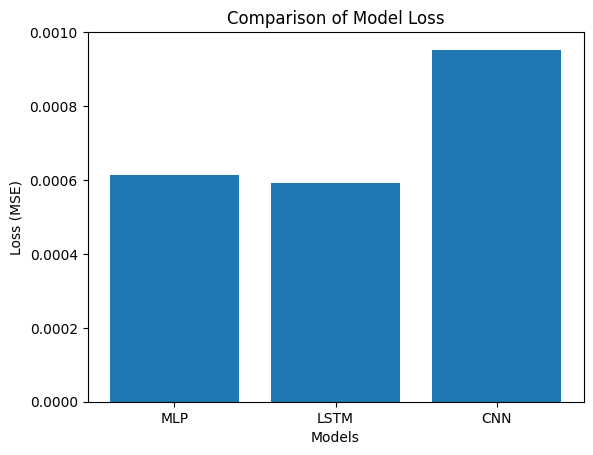

In [ ]:
# Evaluate the models
# mlp_score = mlp_model.evaluate(X_test_mlp, y_test_mlp, verbose=0)
# lstm_score = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)

# Create a bar plot to compare the loss values
models = ['MLP', 'LSTM','CNN']
loss_values = [test_acc_mlp, test_acc_lstm,test_acc_cnn]

plt.bar(models, loss_values)
plt.title('Comparison of Model Loss')
plt.xlabel('Models')
plt.ylabel('Loss (MSE)')
plt.show()


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
def analyse_strategy(test_date_index,pred_mlp,test_data_target,message):
  df_predictions = pd.DataFrame(
      {"Date": test_date_index.flatten(), "Pred": pred_mlp.flatten(), "Ret": test_data_target.flatten()}
  )
  df_predictions.Date = pd.to_datetime(df_predictions.Date, format="%YYYY-%mm-%dd")
  df_res = df_predictions
  df_res["Positions"] = np.where(df_res["Pred"] > 0.5, 1, -1)
  df_res["Positions_shift"] = df_res["Positions"].shift(1)
  df_res["Strat_ret"] = df_res["Positions"].shift(1) * df_res["Ret"]
  df_res["Positions_L"] = df_res["Positions"].shift(1)
  df_res["Positions_L"][df_res["Positions_L"] == -1] = 0
  df_res["Strat_ret_L"] = df_res["Positions_L"] * df_res["Ret"]
  df_res["CumRet"] = df_res["Strat_ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  df_res["CumRet_L"] = (
      df_res["Strat_ret_L"].expanding().apply(lambda x: np.prod(1 + x) - 1)
  )
  df_res["bhRet"] = df_res["Ret"].expanding().apply(lambda x: np.prod(1 + x) - 1)

  Final_Return_L = np.prod(1 + df_res["Strat_ret_L"]) - 1
  Final_Return = np.prod(1 + df_res["Strat_ret"]) - 1
  Buy_Return = np.prod(1 + df_res["Ret"]) - 1

  print("For ",message," Strat Return Long Only =", Final_Return_L * 100, "%")
  print("For ",message," Strat Return =", Final_Return * 100, "%")
  print("For ",message," Buy and Hold Return =", Buy_Return * 100, "%")

  import matplotlib.pyplot as plt
  fig = plt.figure(figsize=(12, 6))
  ax = plt.gca()
  df_res.plot(x="Date", y="bhRet", label="Buy&Hold", ax=ax)
  df_res.plot(x="Date", y="CumRet_L", label="Strat Only Long", ax=ax)
  df_res.plot(x="Date", y="CumRet", label="Strat Long/Short", ax=ax)
  plt.title("Strategy returns with "+str(message))
  plt.xlabel("date")
  plt.ylabel("Cumulative Returns")
  plt.grid()
  plt.show()

  df_res["trade_bin"] = df_res["Positions"].diff().abs()
  df_res["trade_bin"] = df_res["trade_bin"] / 2



For  1b vanilla MLP with leakage in training  Strat Return Long Only = 31.918328314692126 %
For  1b vanilla MLP with leakage in training  Strat Return = 52.959497163819094 %
For  1b vanilla MLP with leakage in training  Buy and Hold Return = 10.73045820054308 %


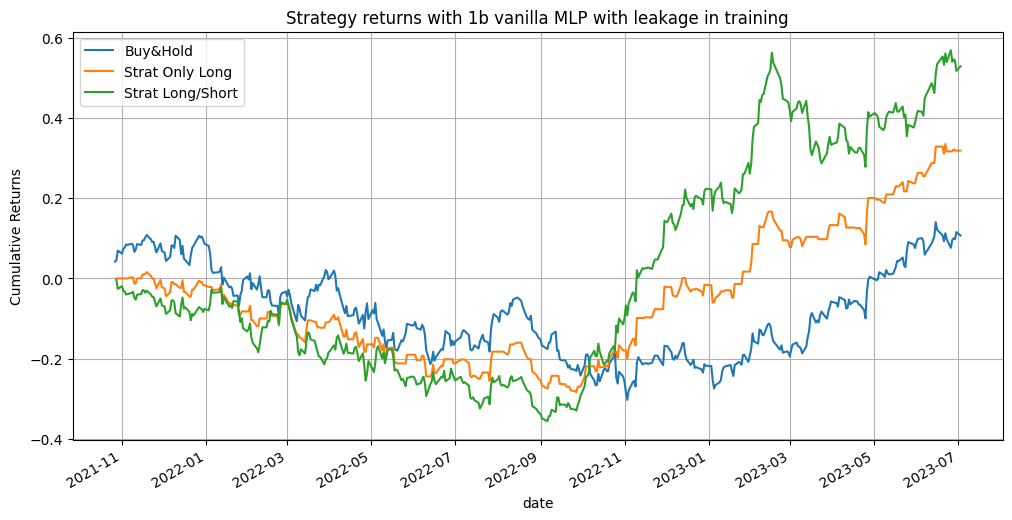

In [ ]:
analyse_strategy(test_date_index,pred_mlp,ret,"1b vanilla MLP with leakage in training")


For  1b vanilla LSTM with leakage in training  Strat Return Long Only = 44.95959774988718 %
For  1b vanilla LSTM with leakage in training  Strat Return = 84.87150834782804 %
For  1b vanilla LSTM with leakage in training  Buy and Hold Return = 10.73045820054308 %


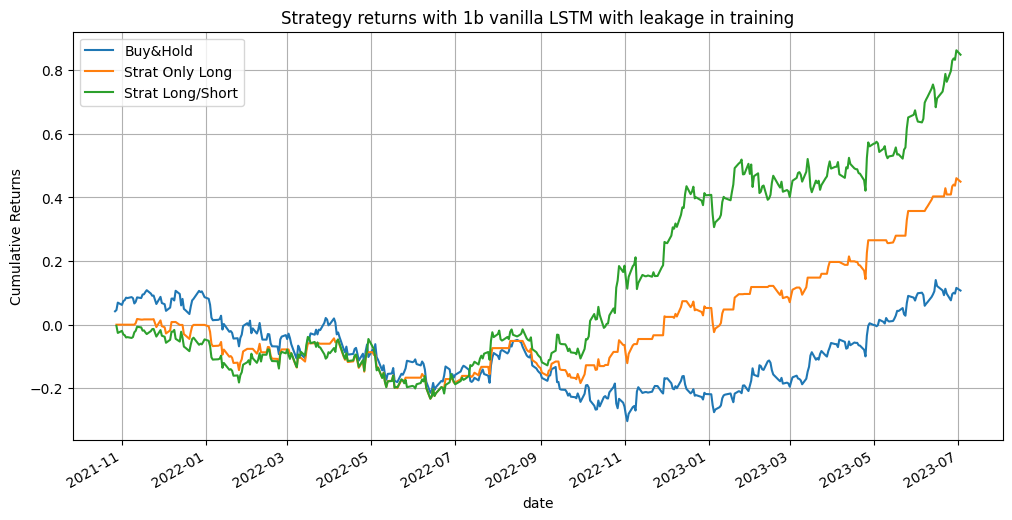

In [ ]:
analyse_strategy(test_date_index,pred_lstm,ret,"1b vanilla LSTM with leakage in training")


For  1b vanilla CNN with leakage in training  Strat Return Long Only = -1.6770451294114919 %
For  1b vanilla CNN with leakage in training  Strat Return = -19.849488995919263 %
For  1b vanilla CNN with leakage in training  Buy and Hold Return = 2.8102425782930984 %


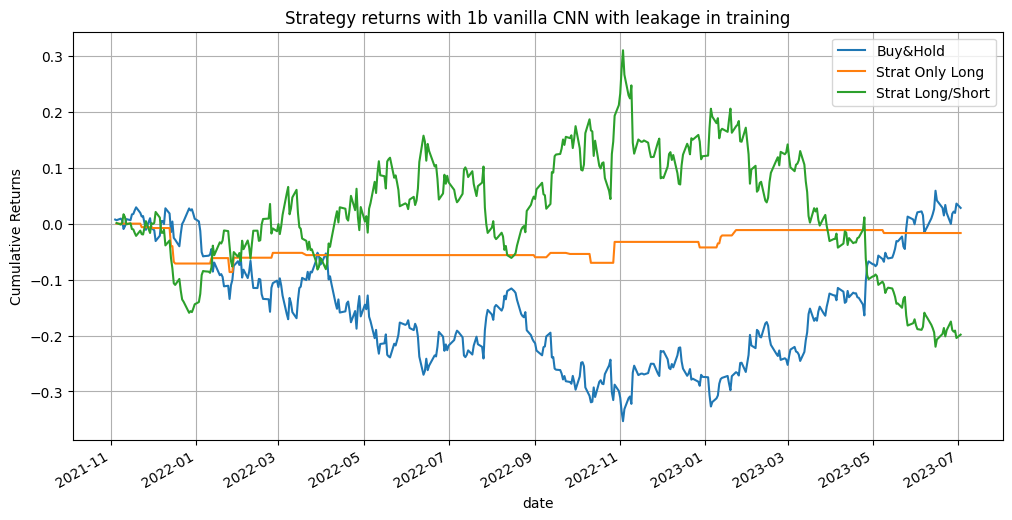

0.05048076923076923

In [ ]:
analyse_strategy(test_date_index_cnn,pred_cnn,ret_cnn,"1b vanilla CNN with leakage in training")
pred_cnn.mean()

##Step_2

In [ ]:
def dostep1(new_dataset,split_ratio,purge_factor=None):
  ticker_prices_diff=new_dataset
  lookback_global=30
  if purge_factor is not None :
    purge_factor=lookback_global
  split_factor=split_ratio
  window_size_global=lookback_global

  # scaled_data=preprocess_data(ticker_prices_diff)
  scaled_data=ticker_prices_diff
  # print(scaled_data.describe())

  X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,test_date_index,ret=prepare_mlp_lstm_data(split_factor,scaled_data,lookback_global,purge_factor)
  X_train_cnn_gaf_leaked_1b,X_test_cnn_gaf_leaked_1b,y_train_cnn_gaf_leaked_1b,y_test_cnn_gaf_leaked_1b,test_date_index_cnn,ret_cnn=prepare_gaf_cnn_data(window_size_global,scaled_data,split_factor,purge_factor)


  # Verify the shapes of the data
  # print("MLP_LSTM Training data shape:", X_train_mlp_lstm_leaked_1b.shape)
  # print("MLP_LSTM Testing data shape:", X_test_mlp_lstm_leaked_1b.shape)
  # print("MLP_LSTM Training labels shape:", y_train_mlp_lstm_leaked_1b.shape)
  # print("MLP_LSTM Testing labels shape:", y_test_mlp_lstm_leaked_1b.shape)
  # Verify the shapes of the data
  # print("cnn_gaf Training data shape:", X_train_cnn_gaf_leaked_1b.shape)
  # print("cnn_gaf Testing data shape:", X_test_cnn_gaf_leaked_1b.shape)
  # print("cnn_gaf Training labels shape:", y_train_cnn_gaf_leaked_1b.shape)
  # print("cnn_gaf Testing labels shape:", y_test_cnn_gaf_leaked_1b.shape)
  tf.keras.backend.clear_session()
  tf.random.set_seed(1234)

  pred_mlp,test_acc_mlp,train_acc_with_epoch_mlp=evaluate_model(create_mlp_model(lookback_global),X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,"Vanilla MLP Model with Leaked data")
  pred_lstm,test_acc_lstm,train_acc_with_epoch_lstm=evaluate_model(create_lstm_model(lookback_global),X_train_mlp_lstm_leaked_1b,X_test_mlp_lstm_leaked_1b,y_train_mlp_lstm_leaked_1b,y_test_mlp_lstm_leaked_1b,"Vanilla lstm Model with Leaked data")
  pred_cnn,test_acc_cnn,train_acc_with_epoch_cnn=evaluate_model_cnn(create_cnn_model(lookback_global),X_train_cnn_gaf_leaked_1b,X_test_cnn_gaf_leaked_1b,y_train_cnn_gaf_leaked_1b,y_test_cnn_gaf_leaked_1b,"Vanilla cnn Model with Leaked data")
  return test_date_index,ret,test_date_index_cnn,ret_cnn,pred_mlp,pred_lstm,pred_cnn


# print(ticker_prices_diff)
def step2(ticker_prices_diff,train_size=500.0,test_size=500.0):
  total=train_size+test_size
  split_ratio=train_size/total
  steps=0
  time_backtest_mlp=[]
  pred_backtest_mlp=[]
  ret_backtest_mlp=[]

  time_backtest_lstm=[]
  pred_backtest_lstm=[]
  ret_backtest_lstm=[]

  time_backtest_cnn=[]
  pred_backtest_cnn=[]
  ret_backtest_cnn=[]




  while (steps)*test_size+total<=len(ticker_prices_diff):
    new_dataset=ticker_prices_diff[int(steps*test_size):int(steps*test_size+total)]

    # print("start ",steps*train_size," end ",steps*train_size+total)
    # print(new_dataset.shape)
    steps=steps+1
    # print(new_dataset)
    test_date_index,ret,test_date_index_cnn,ret_cnn,pred_mlp,pred_lstm,pred_cnn=dostep1(new_dataset,split_ratio)
    # print(test_date_index)
    # print(pred_mlp)
    # print(y_test_mlp_lstm_leaked_1b)

    time_backtest_mlp = np.append(time_backtest_mlp, test_date_index.flatten())
    pred_backtest_mlp = np.append(pred_backtest_mlp, pred_mlp.flatten())
    ret_backtest_mlp = np.append(ret_backtest_mlp, ret.flatten())

    time_backtest_lstm = np.append(time_backtest_lstm, test_date_index.flatten())
    pred_backtest_lstm = np.append(pred_backtest_lstm, pred_lstm.flatten())
    ret_backtest_lstm = np.append(ret_backtest_lstm, ret.flatten())

    time_backtest_cnn = np.append(time_backtest_cnn, test_date_index_cnn.flatten())
    pred_backtest_cnn = np.append(pred_backtest_cnn, pred_cnn.flatten())
    ret_backtest_cnn = np.append(ret_backtest_cnn, ret_cnn.flatten())


  analyse_strategy(time_backtest_mlp,pred_backtest_mlp,ret_backtest_mlp,"2 MLP with leakage in training")
  analyse_strategy(time_backtest_lstm,pred_backtest_lstm,ret_backtest_lstm,"2 LSTM with leakage in training")
  analyse_strategy(time_backtest_cnn,pred_backtest_cnn,ret_backtest_cnn,"2 CNN with leakage in training")



16/16 [==============================] - 0s 2ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.2542175054550171 , train_accuracy =  0.23782387375831604
16/16 [==============================] - 0s 5ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.25345712900161743 , train_accuracy =  0.2506745159626007
15/15 [==============================] - 0s 6ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.4995538592338562 , train_accuracy =  0.4873022139072418
16/16 [==============================] - 0s 1ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.26159143447875977 , train_accuracy =  0.226573646068573
16/16 [==============================] - 0s 5ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.2426535040140152 , train_accuracy =  0.24581396579742432
15/15 [==============================] - 0s 5ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.5002541542053223 , train_

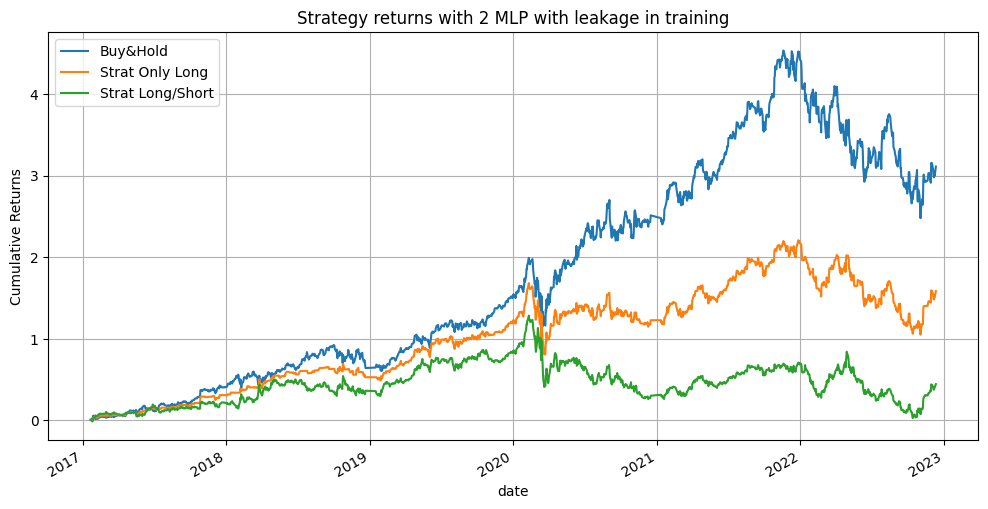

For  2 LSTM with leakage in training  Strat Return Long Only = 149.73206603028353 %
For  2 LSTM with leakage in training  Strat Return = 39.014445858551674 %
For  2 LSTM with leakage in training  Buy and Hold Return = 310.9624674366798 %


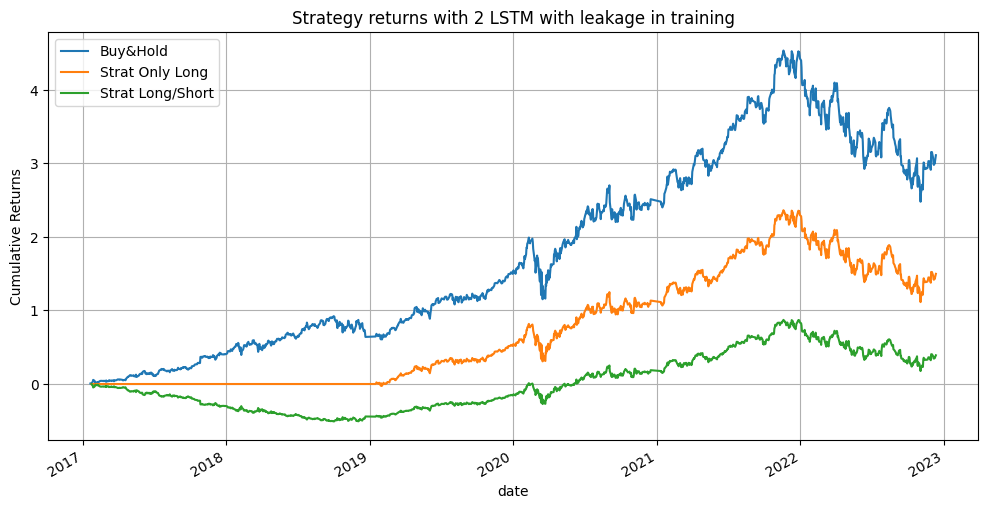

For  2 CNN with leakage in training  Strat Return Long Only = 14.807820800053673 %
For  2 CNN with leakage in training  Strat Return = -75.20697737458528 %
For  2 CNN with leakage in training  Buy and Hold Return = 262.74357592082396 %


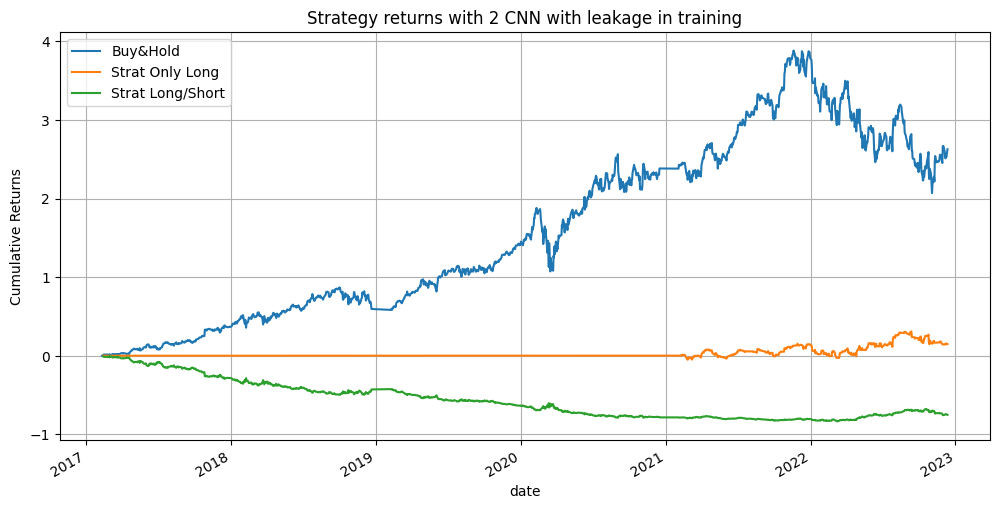

In [ ]:
step2(ticker_prices_diff)

3/3 [==============================] - 0s 4ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.2557287812232971 , train_accuracy =  0.2371140718460083
3/3 [==============================] - 0s 10ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.2503449618816376 , train_accuracy =  0.25196877121925354
3/3 [==============================] - 0s 7ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  1.1628626585006714 , train_accuracy =  0.15641924738883972
3/3 [==============================] - 0s 3ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.24443604052066803 , train_accuracy =  0.23348698019981384
3/3 [==============================] - 0s 8ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.2481924295425415 , train_accuracy =  0.24896974861621857
3/3 [==============================] - 0s 7ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.4501464366912842 , train_accuracy 

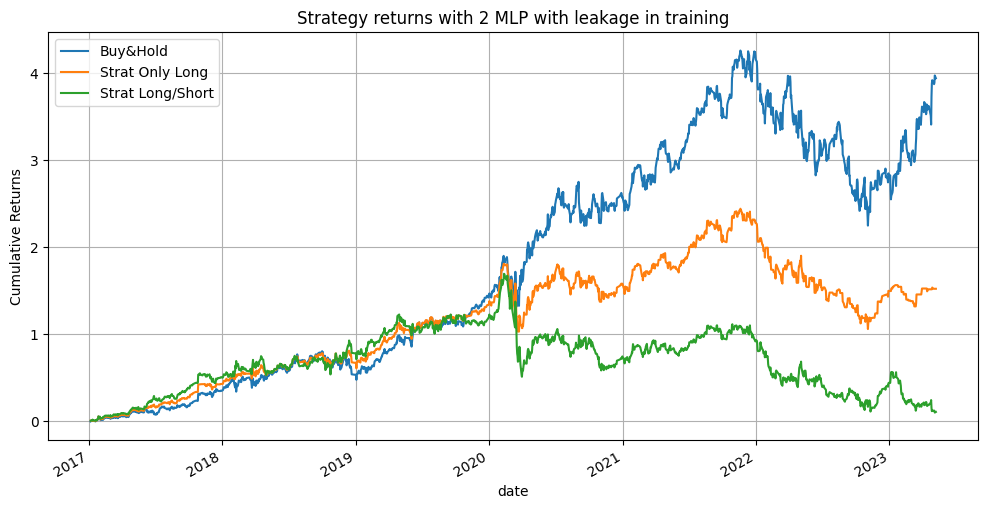

For  2 LSTM with leakage in training  Strat Return Long Only = 379.948046917187 %
For  2 LSTM with leakage in training  Strat Return = 342.8365241300309 %
For  2 LSTM with leakage in training  Buy and Hold Return = 394.44079397778233 %


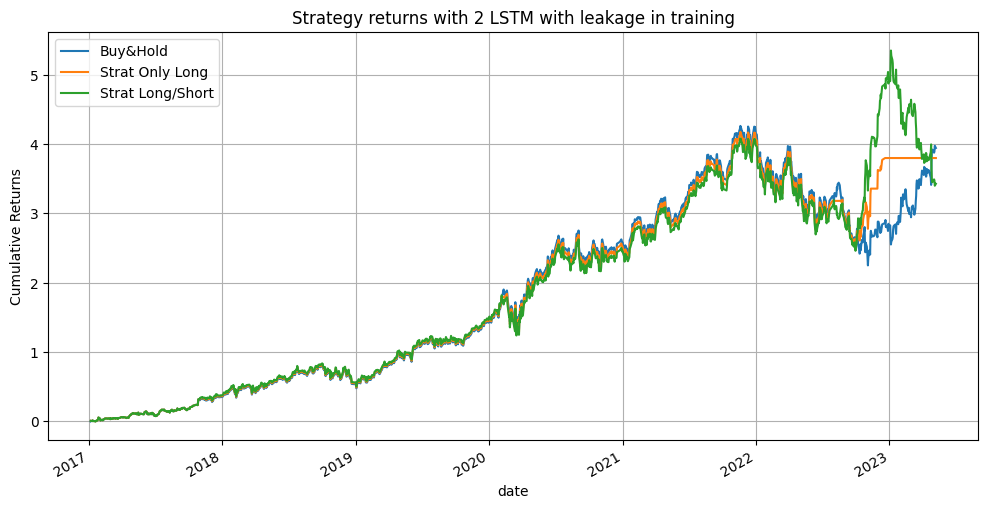

For  2 CNN with leakage in training  Strat Return Long Only = 48.746106555747026 %
For  2 CNN with leakage in training  Strat Return = -70.91670811766708 %
For  2 CNN with leakage in training  Buy and Hold Return = 456.5836897247478 %


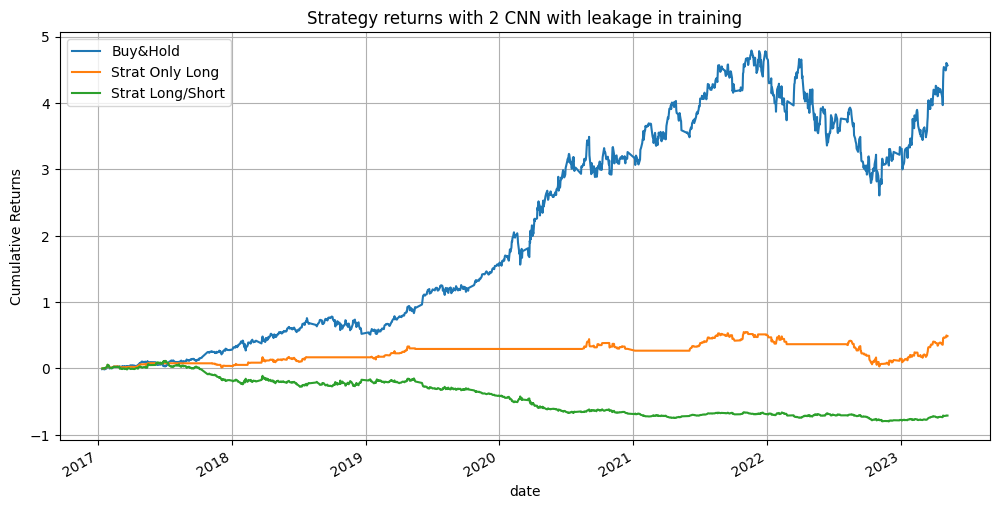

In [ ]:
step2(ticker_prices_diff,500,100)

Step 3 We use purging to prevent information from flowing from testing set to training set by reducing the last 30(lookback size) of the the observations from the training set . We modify our step 2 function as follows:-  

In [ ]:
def step3(ticker_prices_diff,train_size=500.0,test_size=500.0):
  total=train_size+test_size
  split_ratio=train_size/total
  steps=0
  time_backtest_mlp=[]
  pred_backtest_mlp=[]
  ret_backtest_mlp=[]

  time_backtest_lstm=[]
  pred_backtest_lstm=[]
  ret_backtest_lstm=[]

  time_backtest_cnn=[]
  pred_backtest_cnn=[]
  ret_backtest_cnn=[]




  while (steps)*test_size+total<=len(ticker_prices_diff):
    new_dataset=ticker_prices_diff[int(steps*test_size):int(steps*test_size+total)]

    # print("start ",steps*train_size," end ",steps*train_size+total)
    # print(new_dataset.shape)
    steps=steps+1
    # print(new_dataset)
    test_date_index,ret,test_date_index_cnn,ret_cnn,pred_mlp,pred_lstm,pred_cnn=dostep1(new_dataset,split_ratio,1)
    # print(test_date_index)
    # print(pred_mlp)
    # print(y_test_mlp_lstm_leaked_1b)

    time_backtest_mlp = np.append(time_backtest_mlp, test_date_index.flatten())
    pred_backtest_mlp = np.append(pred_backtest_mlp, pred_mlp.flatten())
    ret_backtest_mlp = np.append(ret_backtest_mlp, ret.flatten())

    time_backtest_lstm = np.append(time_backtest_lstm, test_date_index.flatten())
    pred_backtest_lstm = np.append(pred_backtest_lstm, pred_lstm.flatten())
    ret_backtest_lstm = np.append(ret_backtest_lstm, ret.flatten())

    time_backtest_cnn = np.append(time_backtest_cnn, test_date_index_cnn.flatten())
    pred_backtest_cnn = np.append(pred_backtest_cnn, pred_cnn.flatten())
    ret_backtest_cnn = np.append(ret_backtest_cnn, ret_cnn.flatten())


  analyse_strategy(time_backtest_mlp,pred_backtest_mlp,ret_backtest_mlp,"3 MLP without leakage in training")
  analyse_strategy(time_backtest_lstm,pred_backtest_lstm,ret_backtest_lstm,"3 LSTM without leakage in training")
  analyse_strategy(time_backtest_cnn,pred_backtest_cnn,ret_backtest_cnn,"3 CNN without leakage in training")



16/16 [==============================] - 0s 2ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.2492508441209793 , train_accuracy =  0.2359299212694168
16/16 [==============================] - 0s 5ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.24657920002937317 , train_accuracy =  0.2507198750972748
15/15 [==============================] - 0s 6ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  1.6543599367141724 , train_accuracy =  0.7717542052268982
16/16 [==============================] - 0s 1ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.26877057552337646 , train_accuracy =  0.22605161368846893
16/16 [==============================] - 0s 6ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.24276195466518402 , train_accuracy =  0.24711811542510986
15/15 [==============================] - 0s 7ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.5054495334625244 , trai

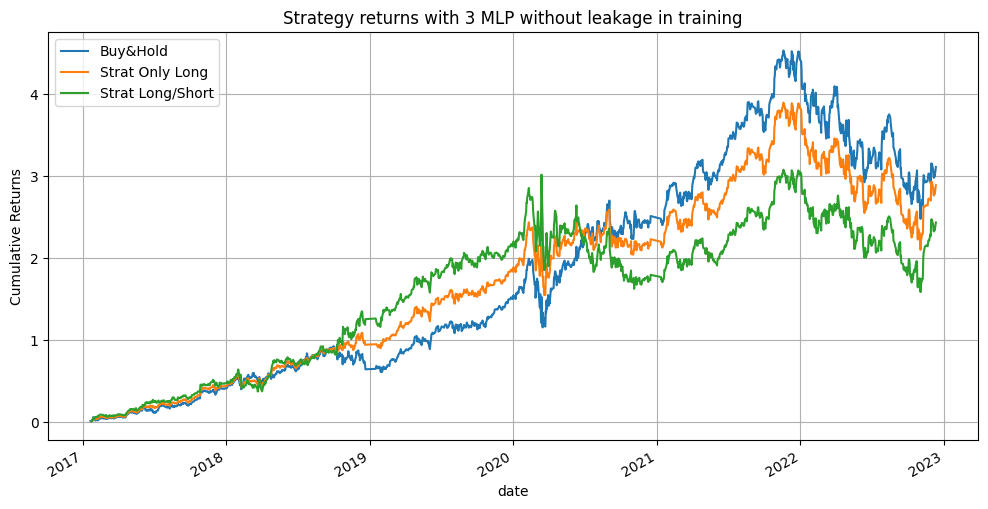

For  3 LSTM without leakage in training  Strat Return Long Only = 308.0804550146416 %
For  3 LSTM without leakage in training  Strat Return = 308.0804550146416 %
For  3 LSTM without leakage in training  Buy and Hold Return = 310.9624674366798 %


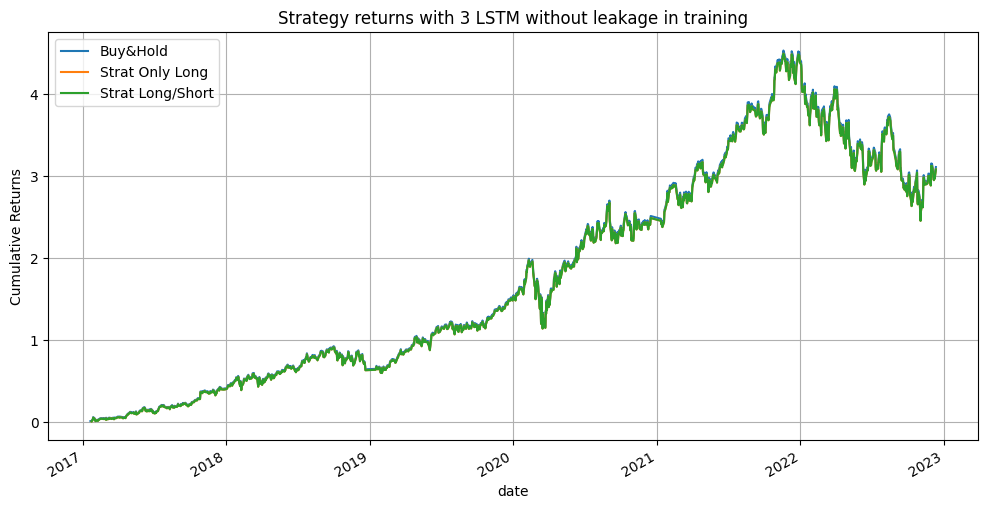

For  3 CNN without leakage in training  Strat Return Long Only = 11.67735695745915 %
For  3 CNN without leakage in training  Strat Return = -77.9826668842922 %
For  3 CNN without leakage in training  Buy and Hold Return = 262.74357592082396 %


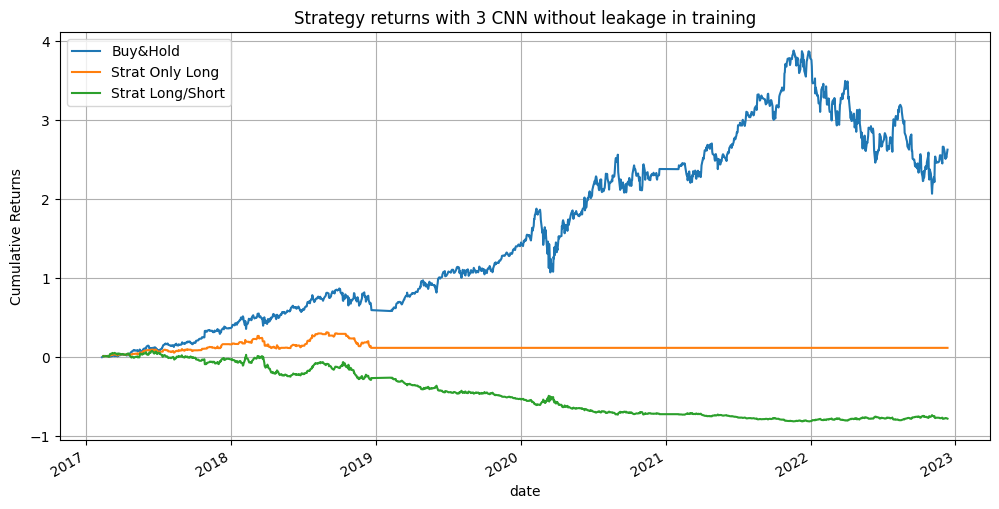

In [ ]:
step3(ticker_prices_diff)

3/3 [==============================] - 0s 3ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.25376883149147034 , train_accuracy =  0.23368346691131592
3/3 [==============================] - 0s 7ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.24974742531776428 , train_accuracy =  0.24990896880626678
3/3 [==============================] - 0s 7ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.975671112537384 , train_accuracy =  0.06438342481851578
3/3 [==============================] - 0s 4ms/step
Vanilla MLP Model with Leaked data  test accuracy (loss) =  0.24550952017307281 , train_accuracy =  0.23488125205039978
3/3 [==============================] - 0s 10ms/step
Vanilla lstm Model with Leaked data  test accuracy (loss) =  0.24822132289409637 , train_accuracy =  0.24950376152992249
3/3 [==============================] - 0s 8ms/step
Vanilla cnn Model with Leaked data  test accuracy (loss) =  0.4442998170852661 , train_accura

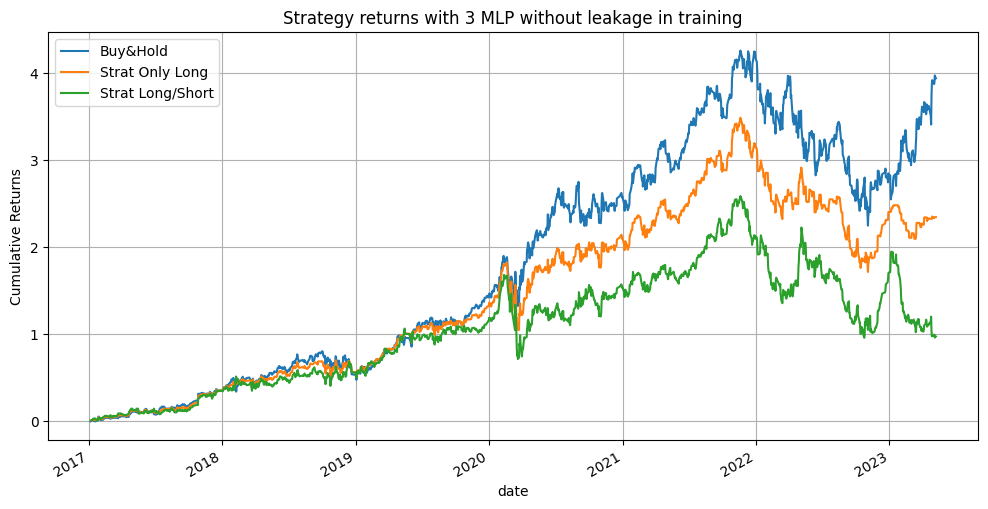

For  3 LSTM without leakage in training  Strat Return Long Only = 289.6809565485575 %
For  3 LSTM without leakage in training  Strat Return = 196.71827132335181 %
For  3 LSTM without leakage in training  Buy and Hold Return = 394.44079397778233 %


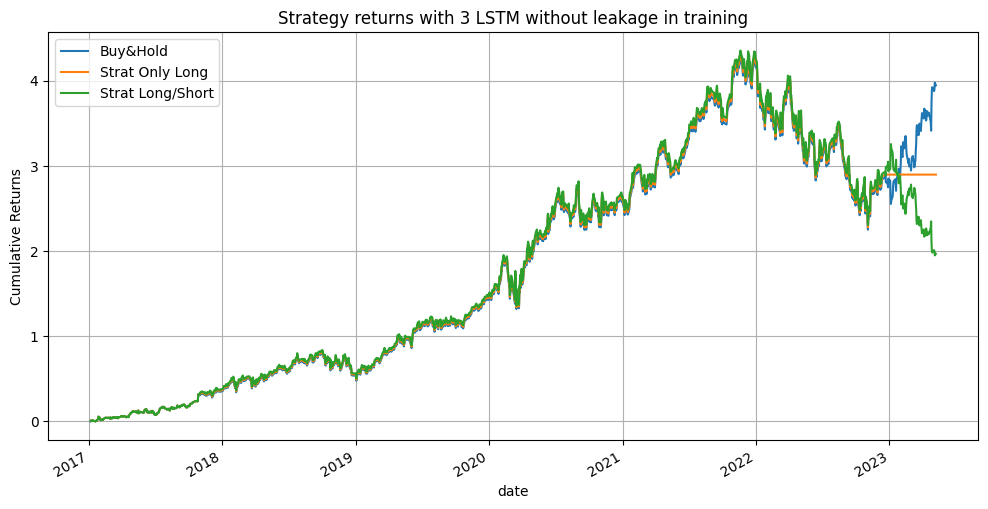

For  3 CNN without leakage in training  Strat Return Long Only = 49.10870732984387 %
For  3 CNN without leakage in training  Strat Return = -72.36428293228687 %
For  3 CNN without leakage in training  Buy and Hold Return = 456.5836897247478 %


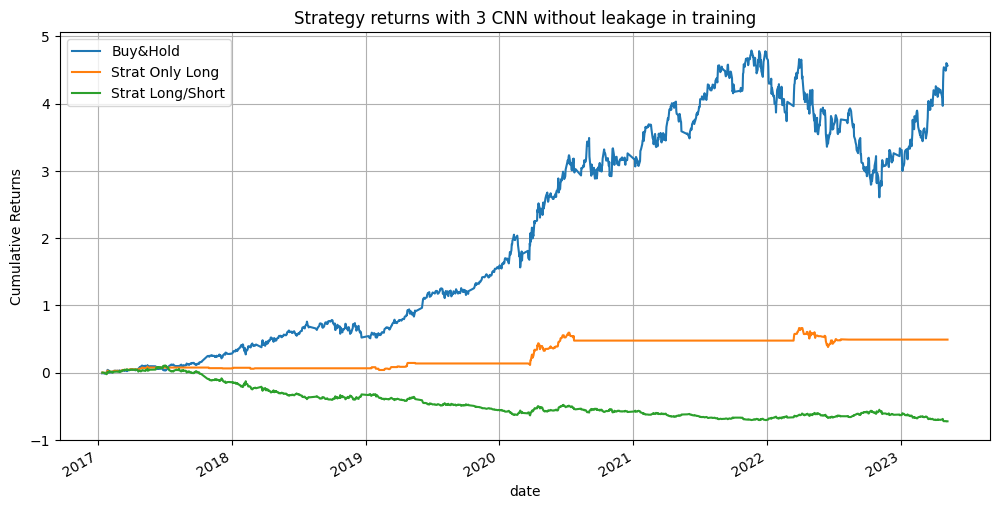

In [ ]:
step3(ticker_prices_diff,500,100)